# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:





---

---
mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain.


---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










## Handling missing value dengan menggunakan method ='ffill'

In [3]:
#code here

# Handling missing value dengan menggunakan method ='ffill'
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [5]:
df.fillna(method='ffill', inplace=True)

df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

## Finding dan Handling outlier menggunakan metode Interquartile range 

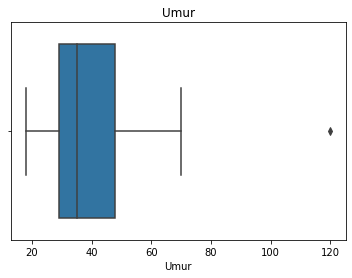

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Umur', data=df);
plt.title('Umur')
plt.show()

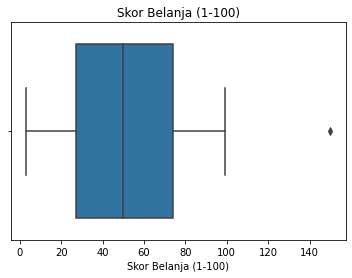

In [13]:
sns.boxplot(x='Skor Belanja (1-100)', data=df);
plt.title('Skor Belanja (1-100)')
plt.show()

In [14]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return lower_bound, upper_bound

In [17]:
import numpy as np
def get_outlier_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

print(get_outlier_iqr(df['Umur'].values))
print(get_outlier_iqr(df['Skor Belanja (1-100)'].values))

[120.]
[150.]


In [18]:
def remove_outlier_IQR(dff):
    Q1 = dff.quantile(0.25)
    Q3 = dff.quantile(0.75)
    IQR = Q3 - Q1
    df_final = dff[~((dff<(Q1 - 1.5*IQR)) | (dff>(Q3+1.5*IQR)))]
    return df_final

In [19]:
df_outlier_remove= remove_outlier_IQR(df[['Umur','Skor Belanja (1-100)']])
df_outlier_remove.dropna(axis=0,inplace=True)

<AxesSubplot:xlabel='Umur'>

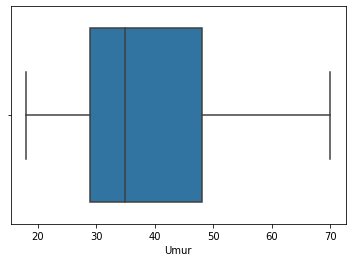

In [20]:
sns.boxplot(x='Umur', data=df_outlier_remove)

<AxesSubplot:xlabel='Skor Belanja (1-100)'>

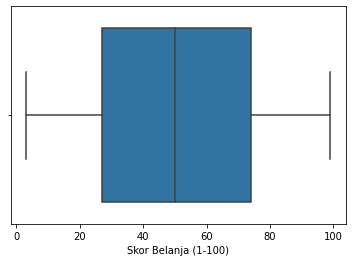

In [21]:
sns.boxplot(x='Skor Belanja (1-100)', data=df_outlier_remove)

## Lakukan rescaling data menggunakan StandardScaler 

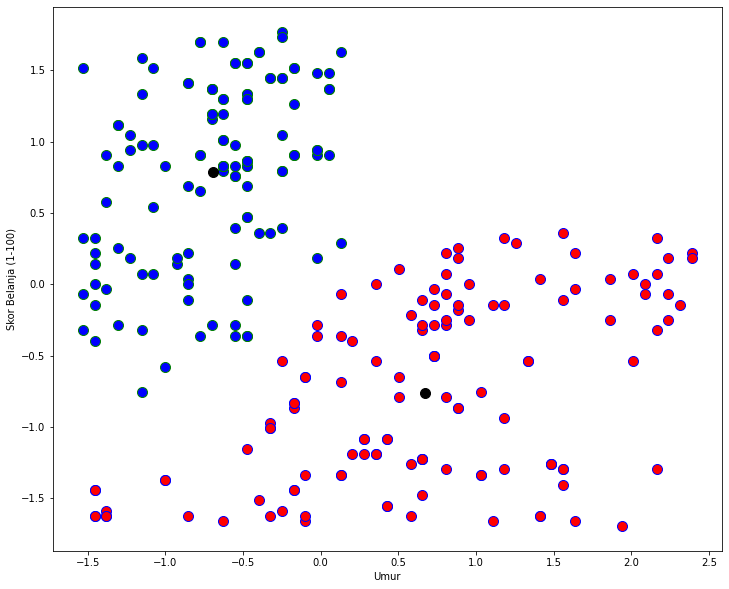

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_remove.astype(float))

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data=dfoutlier_std, columns=['Umur','Skor Belanja (1-100)'])
new_dfoutlier_std['label_kmeans1'] = labels1

plt.figure(figsize=(12,10))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1 == 1], c='red', s=100, edgecolor='blue', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

## Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat 

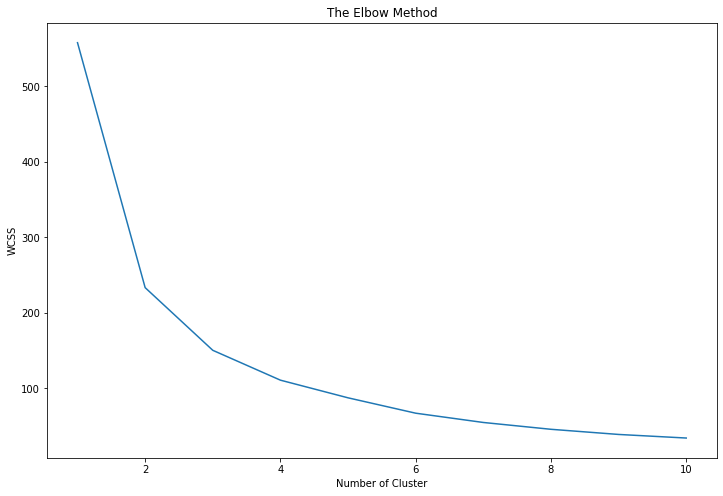

In [29]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state=42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

## Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan

In [30]:
kmeans2 = KMeans(n_clusters=3, init='k-means++',random_state=42).fit(dfoutlier_std)

kmeans2.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2])

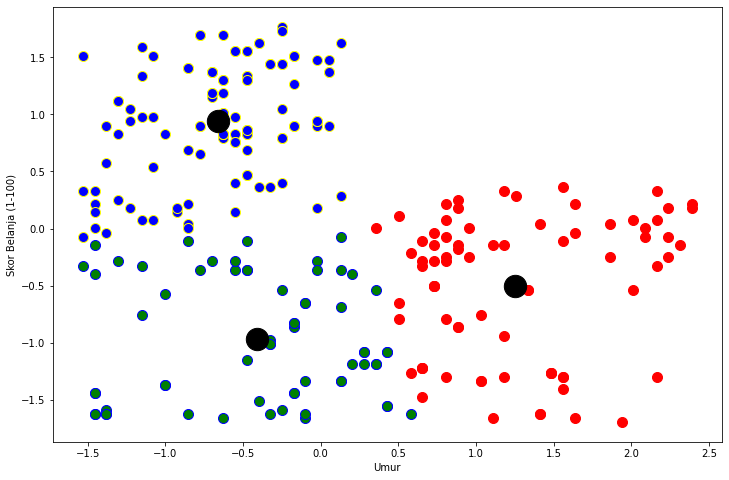

In [33]:
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 0], c='green', s=100, edgecolor='blue', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 1], c='red', s=100, edgecolor='red', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 2], c='blue', s=100, edgecolor='yellow', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:


dapat dilihat cluster yang berwarna biru dapat merupakan cluster dimana umur yang masih tergolong muda namun skor belanja yang dimiliki tinggi.

 Sedangkan cluster hijau memiliki umur yang tidak jauh beda dengan cluster biru namun skor belanja cluster hijau lebih kecil dari biru.
 
 Dan cluster merah merupakan cluster dengan rentang umur yang lebih tua dari 2 cluster sebelumnnya namun skor belanja dari cluster merah lebih rendah dari cluster biru
 
 dari grafik tersebut bisa disimpulkan anak mudah cendrung memiliki keinginan untuk membelanjakan uangnya dengan membeli barang2 yang tidak murah seperti baju dan barang barang branded yang lainnya. 